In [1]:
import numpy as np
import pandas as pd
import cv2 as opencv
import matplotlib.pyplot as plt

In [2]:
# list of folders & filename 
# MyList = [('2021_09_16','m2_ventFW_full.nd2'),
#                       ('2021_09_17','M2_dorsFW_full.nd2'),
#                       ('2021_09_22','m3_dorsHW_full.nd2'),
#                       ('2021_09_22', 'm3_ventHW_full.nd2'),
#                       ('2021_10_16', 'm4_dorsHW_full.nd2'),
#                       ('2021_10_16', 'm4_ventHW_full.nd2')]

MyList = [
#     ('2022_08_05', 'm11_dorsHW_full.nd2'),
#     ('2022_08_05', 'm11_ventHW_full.nd2'),
    ('2022_08_01', 'm13right_dorsHW_full.nd2'),
    ]

## export the zoomed out image as a .tif

In [3]:
# position of CS in microns from the file created in previous Step - "00_ReadHeaderAndMakeList"
input_location = r"../../../../data2/users/tanvid2/CS_imaging_project/Wing_Imaging/"
locationAnalysisData = './dataFolder/Analysis/'
exportImageData = './dataFolder/Analysis/Images/'

In [13]:
locationImageData = input_location + MyList[0][0] + '/'
filename = MyList[0][1]

m, side, _ = filename.split('_')

# read in the image and export as png
from nd2reader import ND2Reader
with ND2Reader(locationImageData + filename) as images:
    print(images.metadata)
    
    if images[0].shape[0] == 0:
        print('something wrong, export tif manually')
        exportImageData = input_location + MyList[0][0] + '/'
    else:
        zoomed_out = images[0]
        opencv.imwrite(exportImageData + m + '_' + side + '_zoomed_out.png', zoomed_out)
        
# mark the CS locations
df = pd.read_csv(locationAnalysisData + m + '_' + side + '_zoomOut.csv')

image = opencv.imread(exportImageData + m + '_' + side + '_zoomed_out.png')
for index, row in df.iterrows():
        x = int(row['zoomOut_x(Pixel)'])
        y = int(row['zoomOut_y(Pixel)'])
        zoomed_out_marked = opencv.circle(image, (x, y), 200, (0, 50, 255), -1)

# transparent red dot on image
alpha = 0.1
image_new = opencv.addWeighted(zoomed_out_marked, alpha, image, 1 - alpha, 0)
exportImageData = './dataFolder/Analysis/Images/'
opencv.imwrite(exportImageData + m + '_' + side + 'zoomed_out_marked.png', image_new) 

{'height': 13078, 'width': 15479, 'date': datetime.datetime(2022, 8, 1, 13, 9, 28), 'fields_of_view': [0], 'frames': [0], 'z_levels': range(0, 1), 'z_coordinates': [2740.12], 'total_images_per_channel': 1, 'channels': ['BF'], 'pixel_microns': 1.617375075255059, 'num_frames': 1, 'experiment': {'description': 'unknown', 'loops': []}, 'events': []}
something wrong, export tif manually


True

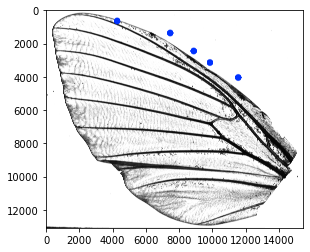

In [14]:
plt.imshow(image_new)

In [15]:
df

,x_highRes,y_highRes,zoomOut_x(Pixel),zoomOut_y(Pixel)
0,16203.9,810.7,11534,4053
1,18964.1,-646.2,9835,3156
2,20543.7,-1773.1,8863,2463
3,22836.5,-3527.5,7452,1383
4,28007.1,-4700.3,4270,661
5,22834.5,-6275.6,7453,-308
6,27025.6,-7876.2,4874,-1293
